In [ ]:
import tensorflow as tf
device = tf.test.gpu_device_name()
if device != '/device:GPU:0':
  raise SystemError('GPU device not found')
device

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown https://drive.google.com/uc?id=1Sp9sq1W3geHwaj0wvx1uFofD67nIjrPq

Downloading...
From: https://drive.google.com/uc?id=1Sp9sq1W3geHwaj0wvx1uFofD67nIjrPq
To: /content/data.zip
100% 40.2M/40.2M [00:00<00:00, 160MB/s]


In [ ]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
   creating: data/invasive/
  inflating: data/invasive/100.jpg   
  inflating: data/invasive/1000.jpg  
  inflating: data/invasive/1002.jpg  
  inflating: data/invasive/1003.jpg  
  inflating: data/invasive/1004.jpg  
  inflating: data/invasive/1005.jpg  
  inflating: data/invasive/1008.jpg  
  inflating: data/invasive/1009.jpg  
  inflating: data/invasive/101.jpg   
  inflating: data/invasive/1010.jpg  
  inflating: data/invasive/1011.jpg  
  inflating: data/invasive/1016.jpg  
  inflating: data/invasive/1019.jpg  
  inflating: data/invasive/102.jpg   
  inflating: data/invasive/1022.jpg  
  inflating: data/invasive/1026.jpg  
  inflating: data/invasive/1028.jpg  
  inflating: data/invasive/103.jpg   
  inflating: data/invasive/1030.jpg  
  inflating: data/invasive/1033.jpg  
  inflating: data/invasive/1035.jpg  
  inflating: data/invasive/1036.jpg  
  inflating: data/invasive/1039.jpg  
  inflating: data/invasive/104.jpg   
  inflating: 

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.8.2'

#Preprocessing Data

##Getting Dataset

###List Data Image

In [ ]:
cd /content/data

/content/data


In [ ]:
import os

directories = os.listdir()

filename=[]
label=[]
for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + "/" + files[j]
    label.append(directories[i])
    print(files[j])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

/content/data/invasive
invasive/672.jpg
invasive/864.jpg
invasive/350.jpg
invasive/275.jpg
invasive/367.jpg
invasive/258.jpg
invasive/831.jpg
invasive/240.jpg
invasive/618.jpg
invasive/625.jpg
invasive/425.jpg
invasive/81.jpg
invasive/508.jpg
invasive/1091.jpg
invasive/974.jpg
invasive/311.jpg
invasive/1061.jpg
invasive/513.jpg
invasive/198.jpg
invasive/201.jpg
invasive/938.jpg
invasive/608.jpg
invasive/400.jpg
invasive/737.jpg
invasive/334.jpg
invasive/492.jpg
invasive/665.jpg
invasive/635.jpg
invasive/862.jpg
invasive/540.jpg
invasive/319.jpg
invasive/265.jpg
invasive/774.jpg
invasive/902.jpg
invasive/979.jpg
invasive/66.jpg
invasive/511.jpg
invasive/192.jpg
invasive/619.jpg
invasive/485.jpg
invasive/103.jpg
invasive/467.jpg
invasive/882.jpg
invasive/722.jpg
invasive/478.jpg
invasive/346.jpg
invasive/35.jpg
invasive/315.jpg
invasive/668.jpg
invasive/851.jpg
invasive/18.jpg
invasive/1041.jpg
invasive/131.jpg
invasive/261.jpg
invasive/952.jpg
invasive/847.jpg
invasive/389.jpg
invasive/

###save the list of images to dataframe pandas

In [ ]:
import pandas as pd

data={"filename": filename, "label": label}

df=pd.DataFrame(data = data)

In [ ]:
df

,filename,label
0,invasive/672.jpg,invasive
1,invasive/864.jpg,invasive
2,invasive/350.jpg,invasive
3,invasive/275.jpg,invasive
4,invasive/367.jpg,invasive
...,...,...
1395,noninvasive/1401.jpg,noninvasive
1396,noninvasive/121.jpg,noninvasive
1397,noninvasive/1315.jpg,noninvasive
1398,noninvasive/415.jpg,noninvasive


###randomize the list of image

In [ ]:
df_shuffled=df.sample(frac=1)
df_shuffled

,filename,label
911,noninvasive/1253.jpg,noninvasive
889,noninvasive/1456.jpg,noninvasive
187,invasive/306.jpg,invasive
666,invasive/754.jpg,invasive
821,noninvasive/351.jpg,noninvasive
...,...,...
106,invasive/301.jpg,invasive
683,invasive/156.jpg,invasive
1193,noninvasive/291.jpg,noninvasive
613,invasive/37.jpg,invasive


###cross validation

In [ ]:
from sklearn.model_selection import KFold

train_data = df_shuffled

Y = train_data[['label']]

kf=KFold(n_splits=5)

###Training set and Test set

In [ ]:
train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(horizontal_flip=True)

#Architecture

###import libraries

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.backend import clear_session
from tensorflow.keras import regularizers

In [ ]:
model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model.trainable = False

In [ ]:
inputs = tf.keras.Input(shape=(224,224,3))
x = tf.keras.layers.Rescaling(1./127.5, offset=-1)(inputs)
x = model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(2,activation='sigmoid')(x)

modelku =tf.keras.Model (inputs, outputs)


In [ ]:
modelku.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable

##Defined direc dataset

In [ ]:
image_dir = '/content/data'

###save best cnn model

In [ ]:
def get_model_name(k):
  return 'model_'+str(k)+'.h5'

##import performance

In [ ]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY=[]
VALIDATION_PRECISION=[]
VALIDATION_RECALL=[]
VALIDATION_F1SCORE=[]

CV=[]

LOSS=[]
ACCURACY=[]

VAL_LOSS=[]
VAL_ACCURACY=[]

##train adapt

In [ ]:
from keras.backend import categorical_crossentropy
save_dir = '/content/sample_data/'
fold_var = 1

#loop function
for train_index, val_index in kf.split(np.zeros(len(Y)),Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data, directory=image_dir, x_col="filename", y_col="label", target_size=(224,224), batch_size=32, class_mode="categorical", shuffle=True)
  valid_data_generator = test_datagen.flow_from_dataframe(validation_data, directory=image_dir, x_col="filename", y_col="label", target_size=(224,224), batch_size=32, class_mode = "categorical", shuffle = False)
  
  
  modelku = tf.keras.Model(inputs, outputs)
  
  modelku.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var), monitor = 'val_accuracy', verbose=1, save_best_only = True, mode='max')

  callback_list = [checkpoint]
  
  hist = modelku.fit(train_data_generator,
                   epochs = 10,
                   callbacks=callback_list,
                   validation_data=valid_data_generator)

  modelku.load_weights("/content/sample_data/model_"+str(fold_var)+".h5")

  results = modelku.evaluate(valid_data_generator)
  results = dict(zip(modelku.metrics_names,results))

  y_predict = modelku.predict(valid_data_generator)

  #answer
  y = np.asarray(valid_data_generator.labels)
  #predict argmax
  y_predict_labels = np.argmax(y_predict, axis=1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average = 'weighted')
  rec = recall_score(y_predict_labels, y, average = 'weighted')
  f1score = f1_score(y_predict_labels, y, average = 'weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("accuracy: ", results['accuracy'])
  print("precision: ", prec)
  print("recall: ", rec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV"+str(fold_var))

  clear_session()

  fold_var += 1
 

Found 1120 validated image filenames belonging to 2 classes.
Found 280 validated image filenames belonging to 2 classes.
Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 0.4561 - accuracy: 0.7821
Epoch 1: val_accuracy improved from -inf to 0.79643, saving model to /content/sample_data/model_1.h5
35/35 [==============================] - 26s 388ms/step - loss: 0.4561 - accuracy: 0.7821 - val_loss: 0.4204 - val_accuracy: 0.7964
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 0.3249 - accuracy: 0.8571
Epoch 2: val_accuracy did not improve from 0.79643
35/35 [==============================] - 12s 356ms/step - loss: 0.3249 - accuracy: 0.8571 - val_loss: 0.4259 - val_accuracy: 0.7893
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.2773 - accuracy: 0.8964
Epoch 3: val_accuracy improved from 0.79643 to 0.81786, saving model to /content/sample_data/model_1.h5
35/35 [==============================] - 13s 363ms/step - loss: 0.2773 - accu

#Analysis

In [ ]:
import matplotlib.pyplot as plt

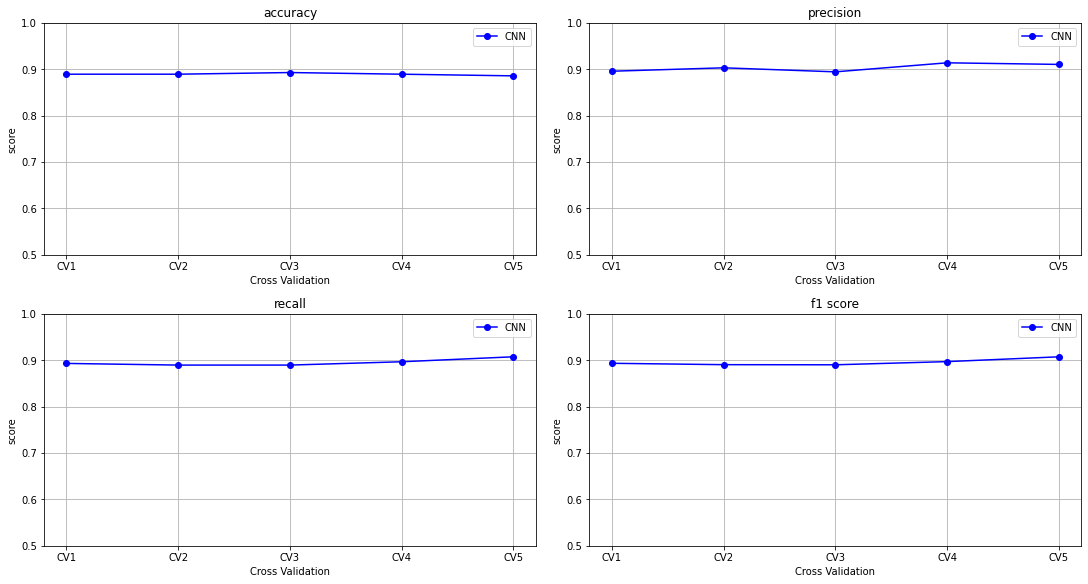

In [ ]:
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, 'b-', marker='o', label='CNN')
axs[0,0].set_title('accuracy')
axs[0,0].set_xlabel("Cross Validation")
axs[0,0].set_ylabel("score")
axs[0,0].set_ylim((0.5, 1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_PRECISION, 'b-', marker='o', label='CNN')
axs[0,1].set_title('precision')
axs[0,1].set_xlabel("Cross Validation")
axs[0,1].set_ylabel("score")
axs[0,1].set_ylim((0.5, 1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_RECALL, 'b-', marker='o', label='CNN')
axs[1,0].set_title('recall')
axs[1,0].set_xlabel("Cross Validation")
axs[1,0].set_ylabel("score")
axs[1,0].set_ylim((0.5, 1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_F1SCORE, 'b-', marker='o', label='CNN')
axs[1,1].set_title('f1 score')
axs[1,1].set_xlabel("Cross Validation")
axs[1,1].set_ylabel("score")
axs[1,1].set_ylim((0.5, 1))
axs[1,1].grid()
axs[1,1].legend()

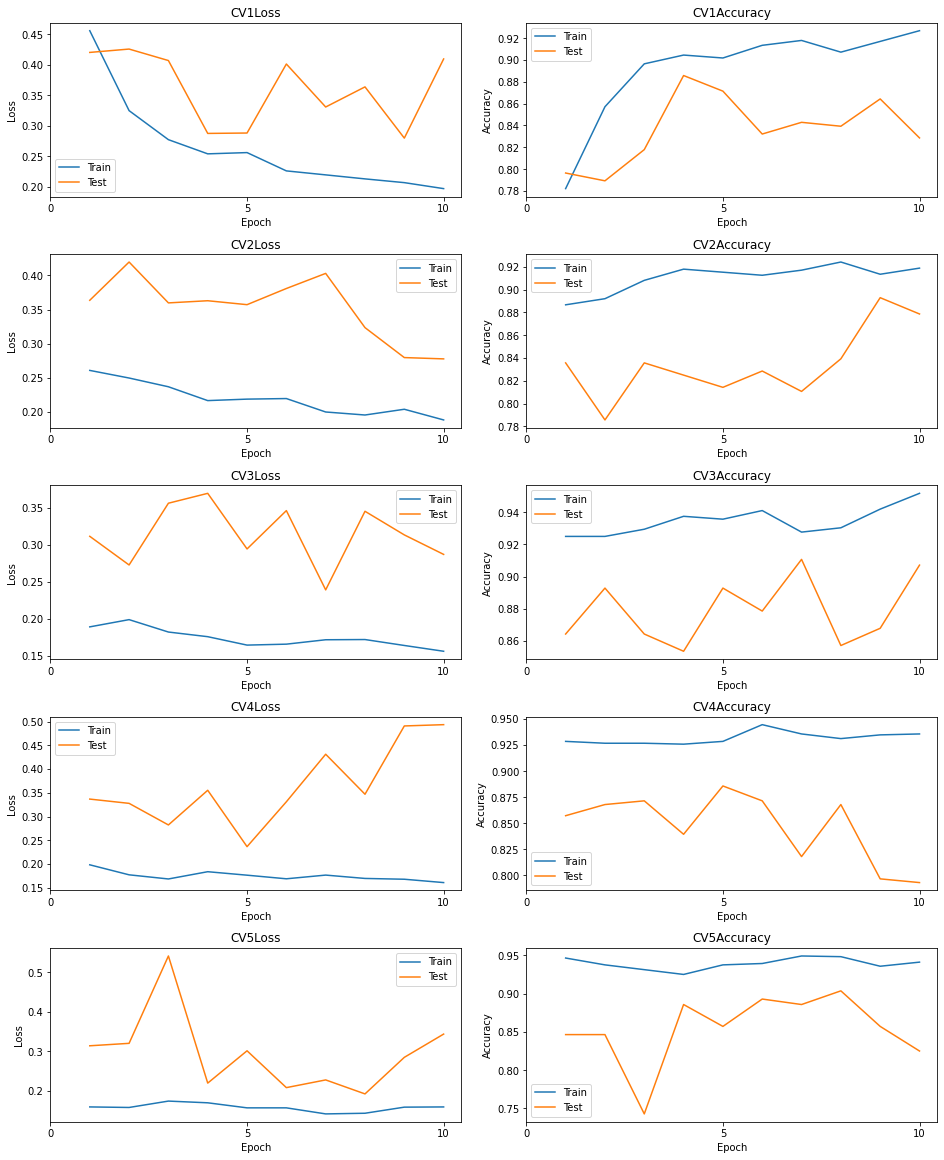

In [ ]:
epochs = 10
x_axis = np.arange(1,epochs+1)

fig, ax = plt.subplots(5,2,constrained_layout=True, figsize=(13,16))

for i in range(5):
  for j in range(2):
    if(j==0):
      ax[i,j].set_title('CV'+str(i+1)+'Loss')
      ax[i,j].set_ylabel('Loss')
      ax[i,j].plot(x_axis, LOSS[i], label="Train")
      ax[i,j].plot(x_axis, VAL_LOSS[i], label="Test")
    else:
      ax[i,j].set_title('CV'+str(i+1)+'Accuracy')
      ax[i,j].set_ylabel('Accuracy')
      ax[i,j].plot(x_axis, ACCURACY[i], label="Train")
      ax[i,j].plot(x_axis, VAL_ACCURACY[i], label="Test")
    
    ax[i,j].set_xlabel('Epoch')
    ax[i,j].set_xticks(np.arange(0, epochs+1, 5))
    ax[i,j].legend()